In [15]:
%load_ext uhed

The uhed extension is already loaded. To reload it, use:
  %reload_ext uhed


In [17]:
SLICE = "gautamrams"

In [18]:
SITE=VTSAM.Illinois

In [19]:
%slice gautamrams

In [20]:
%site vts-illinois

In [21]:
%lab

<IPython.core.display.Javascript object>

# Reserved Topology

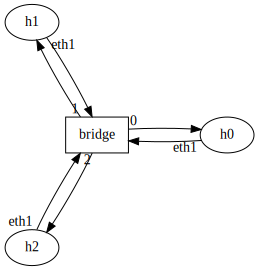

In [22]:
genish.showtopo(manifest)

In [23]:
genish.printlogininfo(manifest)

Client-ID,Username,Host,Port
h0,w0zbxzrtojm,uiuc.vts.bsswks.net,22
h1,gxe19p9q1vh,uiuc.vts.bsswks.net,22
h2,mbd52wcmqbg,uiuc.vts.bsswks.net,22


In [24]:
SITE.getL2Table(context,SLICE,"bridge")

Port,VLAN,MAC,Age


# Observation of Flooding

#SENDING FRAME FROM h0 TO ANY DESTINATION

gramasam@cot-cn:~$ gssh gautamrams h0
/ # /labscripts/oneframe

This program will send arbitrary ethernet frames for testing purposes.

By default it will send a frame on eth1, using the interface MAC address
as the source, to one of 256 random destination MAC addresses.

Interface to send from [eth1]:
Use eth1 MAC as source [y]:
  Using 9a:f8:d1:28:f0:5e as source MAC
Specify destination MAC [n]:

#OBSERVING FRAME RECEIVED AT h1 INTERFACE

gramasam@cot-cn:~$ gssh gautamrams h1
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:31:18.321375 9a:f8:d1:28:f0:5e (oui Unknown) > aa:bb:cc:dd:ee:72 (oui Unknown), ethertype Unknown (0x0820), length 19:
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel

#OBSERVING FRAME RECEIVED AT h2 INTERFACE

gramasam@cot-cn:~$ gssh gautamrams h2
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:31:18.321378 9a:f8:d1:28:f0:5e (oui Unknown) > aa:bb:cc:dd:ee:72 (oui Unknown), ethertype Unknown (0x0820), length 19:
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel

#VERIFYING THAT L2 TABLE OF BRIDGE HAS h0 MAC LEARNED ON PORT 1

In [32]:
SITE.getL2Table(context,SLICE,"bridge")

Port,VLAN,MAC,Age
1,0,9a:f8:d1:28:f0:5e,213


#USING iplink COMMAND TO VERIFY IF h0 MAC ADDRESS IS UPDATED IN ABOVE L2 TABLE OF BRIDGE

gramasam@cot-cn:~$ gssh gautamrams h0
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:39:04.140680 9a:f8:d1:28:f0:5e (oui Unknown) > aa:bb:cc:dd:ee:ac (oui Unknown), ethertype Unknown (0x0820), length 19:
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel
/ # iplink
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
1871: eth1@if1870: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether 9a:f8:d1:28:f0:5e brd ff:ff:ff:ff:ff:ff
/ #

# Question 1A - What do you expect the bridge will do?

When a frame is sent from h0 to any destination, the source address(MAC address of h0) is added to the L2 table. Since destination MAC address is not available in L2 table it forwards the frame to all ports except the incoming port. Hence the frames are received at h1 and h2.

# Observation of Selective send

#SENDING FRAME FROM h1 to h0

gramasam@cot-cn:~$ gssh gautamrams h1
/ # /labscripts/oneframe

This program will send arbitrary ethernet frames for testing purposes.

By default it will send a frame on eth1, using the interface MAC address
as the source, to one of 256 random destination MAC addresses.

Interface to send from [eth1]:
Use eth1 MAC as source [y]:
  Using d2:8f:40:95:0b:b7 as source MAC
Specify destination MAC [n]: y
  Destination MAC (in hexadecimal form): 9a:f8:d1:28:f0:5e
/ #


#VERIFYING FRAME RECEIVED AT h0

gramasam@cot-cn:~$ gssh gautamrams h0
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:53:11.639455 d2:8f:40:95:0b:b7 (oui Unknown) > 9a:f8:d1:28:f0:5e (oui Unknown), ethertype Unk
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel
/ #

#VERIFYING THAT NO FRAME IS RECEIVED AT h2

gramasam@cot-cn:~$ gssh gautamrams h2
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
^C
0 packets captured
0 packets received by filter
0 packets dropped by kernel
/ #

#VERIFYING THAT L2 TABLE OF BRIDGE HAS h1 MAC LEARNED ON PORT 2

In [37]:
SITE.getL2Table(context,SLICE,"bridge")

Port,VLAN,MAC,Age
1,0,9a:f8:d1:28:f0:5e,72
2,0,d2:8f:40:95:0b:b7,8


#USING iplink COMMAND TO VERIFY IF h1 MAC ADDRESS IS UPDATED IN ABOVE L2 TABLE OF BRIDGE

gramasam@cot-cn:~$ gssh gautamrams h1
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:52:08.205682 9a:f8:d1:28:f0:5e (oui Unknown) > aa:bb:cc:dd:ee:58 (oui Unknown), ethertype Unk
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
21:53:11.639247 d2:8f:40:95:0b:b7 (oui Unknown) > 9a:f8:d1:28:f0:5e (oui Unknown), ethertype Unk
        0x0000:  6865 6c6c 6f                             hello
^C
1 packet captured
1 packet received by filter
0 packets dropped by kernel
/ # iplink
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
1873: eth1@if1872: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1
000
    link/ether d2:8f:40:95:0b:b7 brd ff:ff:ff:ff:ff:ff
/ #

# Question 1B - What do you expect the bridge will do?

When a frame is sent from h1 to h0 using destination address(MAC address of h0), the source address(MAC address of h1) is added to the L2 table. Since the destination address is specified, the bridge maps the destination address and finds the desired port to be forwarded from the L2 table and sends the frame only to that particular port. Hence the frame is received in h0 where as no frame is received in h2.